In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [10]:
pip install tensorflow_hub

     ---------------------------------------- 90.3/90.3 kB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Kaggle'

In [4]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [5]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste

 95% 297M/312M [00:02<00:00, 111MB/s]
100% 312M/312M [00:02<00:00, 125MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: Seahorse/9891995103_849905035f_o.jpg  
  inflating: Seahorse/9984393_fb8ac77d6a_o.jpg  
  inflating: Seahorse/Sea Horse (1).jpg  
  inflating: Seahorse/Sea Horse (10).jpg  
  inflating: Seahorse/Sea Horse (11).jpg  
  inflating: Seahorse/Sea Horse (12).jpg  
  inflating: Seahorse/Sea Horse (13).jpg  
  inflating: Seahorse/Sea Horse (14).jpg  
  inflating: Seahorse/Sea Horse (15).jpg  
  inflating: Seahorse/Sea Horse (16).jpg  
  inflating: Seahorse/Sea Horse (17).jpg  
  inflating: Seahorse/Sea Horse (18).jpg  
  inflating: Seahorse/Sea Horse (19).jpg  
  inflating: Seahorse/Sea Horse (2).jpg  
  inflating: Seahorse/Sea Horse (20).jpg  
  inflating: Seahorse/Sea Horse (21).jpg  
  inflating: Seahorse/Sea Horse (22).jpg  
  inflating: Seahorse/Sea Horse (23).jpg  
  inflating: Seahorse/Sea Horse (24).jpg  
  inflating: Seahorse/Sea Horse (25).jpg  
  inflating: Seahorse/Sea Horse (26).jpg  
  inflating: Seahorse/Sea Horse (

In [2]:
import pathlib
data=pathlib.Path("C:/Users/sipis/Downloads/sea")

In [3]:
data

WindowsPath('C:/Users/sipis/Downloads/sea')

In [4]:
list(data.glob("*/*.jpg"))[:5]
image_count=len(list(data.glob("*/*.jpg")))
image_count

13666

In [5]:
sea_dict={
    'Clams':list(data.glob('Clams/*')),
    'Corals':list(data.glob('Corals/*')),
    'Crabs':list(data.glob('Crabs/*')),
    'Dolphin':list(data.glob('Dolphin/*')),
    'Eel':list(data.glob('Eel/*')),
    'Fish':list(data.glob('Fish/*')),
    'Jelly Fish':list(data.glob('Jelly Fish/*')),
    'Lobster':list(data.glob('Lobster/*')),
    'Nudibranches':list(data.glob('Nudibranches/*')),
    'Octopus':list(data.glob('Octopus/*')),
    'Otter':list(data.glob('Otter/*')),
    'Penguin':list(data.glob('Penguin/*')),
    'Puffers':list(data.glob('Puffers/*')),
    'Sea Rays':list(data.glob('Sea Rays/*')),
    'Sea Urchins':list(data.glob('Sea Urchins/*')),
    'Seahorse':list(data.glob('Seahorse/*')),
    'Seal':list(data.glob('Seal/*')),
    'Sharks':list(data.glob('Sharks/*')),
    'Shrimp':list(data.glob('Shrimp/*')),
    'Squid':list(data.glob('Squid/*')),
    'Starfish':list(data.glob('Starfish/*')),
    'Turtle_Tortoise':list(data.glob('Turtle_Tortoise/*')),
    'Whale':list(data.glob('Whale/*'))

}

In [6]:
label_dict={
    'Clams':0,
    'Corals':1,
    'Crabs':2,
    'Dolphin':3,
    'Eel':4,
    'Fish':5,
    'Jelly Fish':6,
    'Lobster':7,
    'Nudibranches':8,
    'Octopus':9,
    'Otter':10,
    'Penguin':11,
    'Puffers':12,
    'Sea Rays':13,
    'Sea Urchins':14,
    'Seahorse':15,
    'Seal':16,
    'Sharks':17,
    'Shrimp':18,
    'Squid':19,
    'Starfish':20,
    'Turtle_Tortoise':21,
    'Whale':22

}

In [7]:
from keras.preprocessing.image import ImageDataGenerator as IDG
train_gen = IDG(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# Load Data
train_ds = train_gen.flow_from_directory(data, target_size=(224,224), class_mode="sparse", subset='training', shuffle=True, batch_size=16)
test_ds = train_gen.flow_from_directory(data, target_size=(224,224), class_mode="sparse", subset='validation', shuffle=True, batch_size=16)


Found 10979 images belonging to 23 classes.
Found 2732 images belonging to 23 classes.


In [8]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [9]:
from tensorflow.keras.layers import Dropout, BatchNormalization
import tensorflow_hub as hub
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))

In [10]:
resnet_model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,  activation="relu"),
    tf.keras.layers.Dense(256,  activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128,  activation="relu"),
    layers.Dense(23, activation='softmax', name='output_layer')
  ])


In [11]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [12]:
resnet_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")

In [13]:
history=resnet_model.fit(train_ds,validation_data=test_ds,epochs=3)

Epoch 1/3
687/687 [==============================] - 411s 594ms/step - loss: 1.1925 - accuracy: 0.6501 - val_loss: 0.7955 - val_accuracy: 0.7548
Epoch 2/3
687/687 [==============================] - 402s 585ms/step - loss: 0.9075 - accuracy: 0.7237 - val_loss: 0.8653 - val_accuracy: 0.7398
Epoch 3/3
687/687 [==============================] - 411s 598ms/step - loss: 0.8079 - accuracy: 0.7553 - val_loss: 0.7238 - val_accuracy: 0.7731


In [15]:
resnet_model.evaluate(test_ds)

171/171 [==============================] - 73s 425ms/step - loss: 0.7309 - accuracy: 0.7866


[0.7308747172355652, 0.7866032123565674]

<AxesSubplot:>

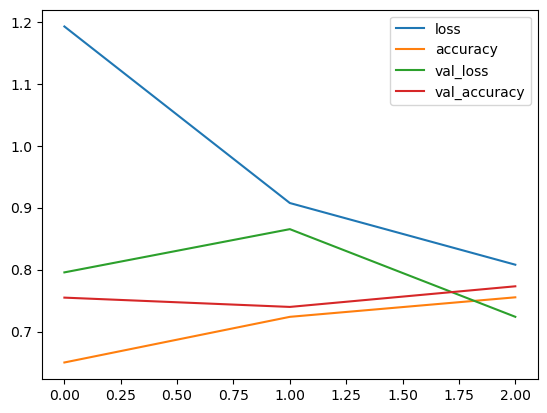

In [16]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [35]:
size=(224,224)
penguin=Image.open("C:/Users/sipis/Downloads/sea/Penguin/8647296411_b46d453b2b_o.jpg").resize(size)

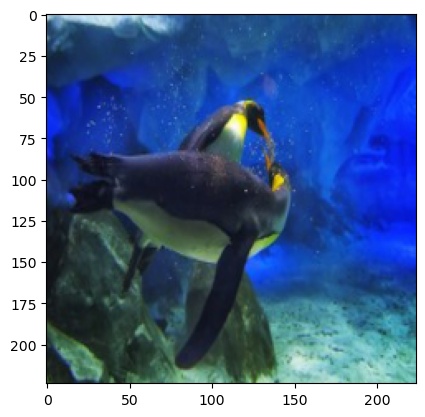

In [36]:
import matplotlib.pyplot as plt
plt.imshow(penguin)

In [37]:
penguin=np.array(penguin)/255.
penguin.shape

(224, 224, 3)

In [38]:
result=resnet_model.predict(penguin[np.newaxis,...])

1/1 [==============================] - 0s 67ms/step


In [39]:
result

array([[5.9572252e-04, 2.3963767e-05, 3.8203383e-05, 7.8041218e-02,
        1.0628555e-03, 4.9980325e-03, 1.0095551e-04, 8.8908659e-05,
        9.1844988e-05, 1.2526035e-04, 6.1410632e-05, 5.3718722e-01,
        3.6306192e-05, 9.9493815e-03, 9.3714034e-06, 3.1413304e-04,
        1.8043725e-02, 3.1044132e-01, 9.8995974e-05, 9.4084069e-04,
        4.7171975e-06, 4.6445162e-04, 3.7281275e-02]], dtype=float32)

In [40]:
for i in label_dict:
  if label_dict[i]==np.argmax(result):
    print(i)

Penguin


In [42]:
resnet_model.save("C:/Users/sipis/Downloads/sea/seaImagemodel.h5")

C:\Users\sipis\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [48]:
from keras.models import load_model
sibi=load_model("C:/Users/sipis/Downloads/sea/seaImagemodel.h5",custom_objects={'KerasLayer':hub.KerasLayer})

In [49]:
sibi.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0